In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# normalize
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), 28 * 28))
x_test = x_test.reshape((len(x_test), 28 * 28))

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
input_dim = 784
encoding_dim = 32
input_img = Input(shape=(input_dim,))

encoded = Dense(450, activation='relu')(input_img)
encoded = BatchNormalization()(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(450, activation='relu')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)


autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 13s 44ms/step - loss: 0.3797 - accuracy: 0.0131 - val_loss: 0.3177 - val_accuracy: 0.0094
Epoch 2/50
235/235 [==============================] - 11s 45ms/step - loss: 0.2930 - accuracy: 0.0190 - val_loss: 0.2952 - val_accuracy: 0.0180
Epoch 3/50
235/235 [==============================] - 9s 37ms/step - loss: 0.2869 - accuracy: 0.0225 - val_loss: 0.2886 - val_accuracy: 0.0188
Epoch 4/50
235/235 [==============================] - 10s 43ms/step - loss: 0.2835 - accuracy: 0.0263 - val_loss: 0.2877 - val_accuracy: 0.0246
Epoch 5/50
235/235 [==============================] - 10s 43ms/step - loss: 0.2813 - accuracy: 0.0297 - val_loss: 0.2831 - val_accuracy: 0.0247
Epoch 6/50
235/235 [==============================] - 10s 41ms/step - loss: 0.2797 - accuracy: 0.0318 - val_loss: 0.2817 - val_accuracy: 0.0316
Epoch 7/50
235/235 [==============================] - 9s 37ms/step - loss: 0.2784 - accuracy: 0.0329 - val_loss: 0.2802 - val_accuracy: 0

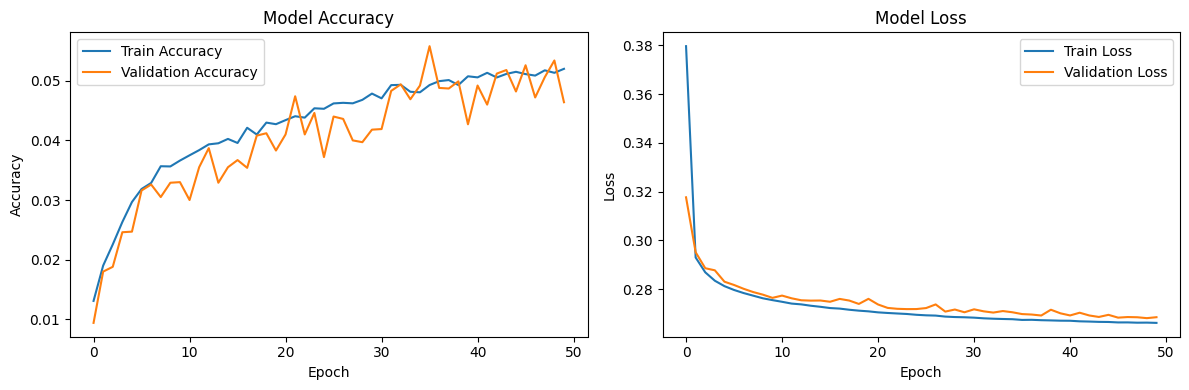

In [ ]:
import pandas as pd

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_18 (Dense)            (None, 450)               353250    
                                                                 
 batch_normalization_12 (Ba  (None, 450)               1800      
 tchNormalization)                                               
                                                                 
 dense_19 (Dense)            (None, 64)                28864     
                                                                 
 batch_normalization_13 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dense_20 (Dense)            (None, 32)                2080

313/313 [==============================] - 2s 5ms/step


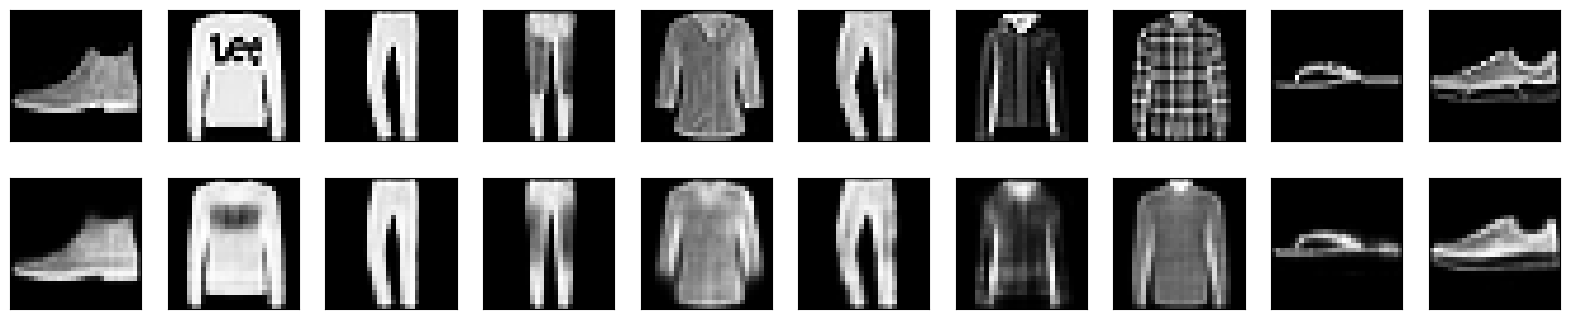

In [ ]:
decoded_imgs = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
encoder = Model(input_img, encoded)
x_train_encoded = encoder.predict(x_train)
x_test_encoded = encoder.predict(x_test)

from tensorflow.keras.models import Sequential
classifier = Sequential()
classifier.add(Dense(128, activation='relu', input_shape=(32,)))
classifier.add(Dense(64, activation='relu'))
classifier.add(Dense(10, activation='softmax'))

classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_classifier = classifier.fit(x_train_encoded, y_train,epochs=50,batch_size=256,validation_data=(x_test_encoded, y_test))

313/313 [==============================] - 1s 2ms/step
Epoch 1/50
235/235 [==============================] - 2s 4ms/step - loss: 0.7314 - accuracy: 0.7437 - val_loss: 0.5313 - val_accuracy: 0.8011
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.4658 - accuracy: 0.8298 - val_loss: 0.4795 - val_accuracy: 0.8271
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.4307 - accuracy: 0.8426 - val_loss: 0.4420 - val_accuracy: 0.8432
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.4071 - accuracy: 0.8519 - val_loss: 0.4327 - val_accuracy: 0.8443
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.3903 - accuracy: 0.8580 - val_loss: 0.4141 - val_accuracy: 0.8500
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.3783 - accuracy: 0.8619 - val_loss: 0.4056 - val_accuracy: 0.8538
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3695 - accuracy: 

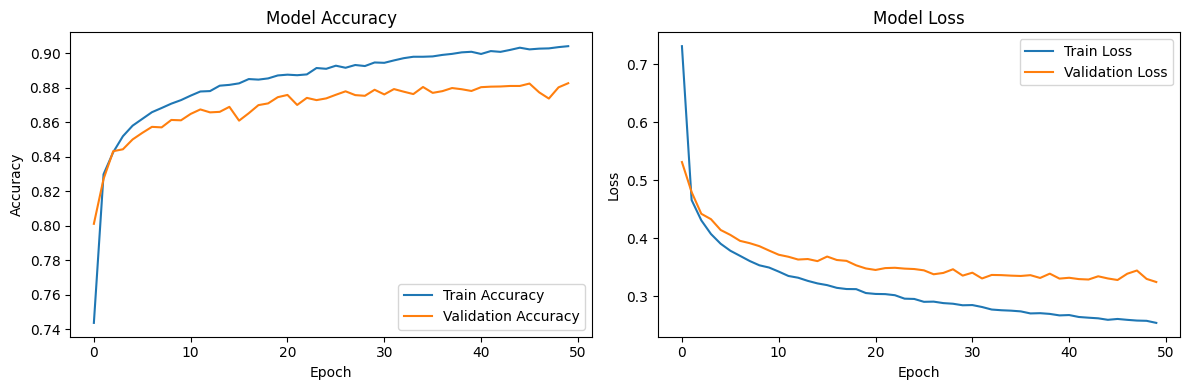

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_classifier.history['accuracy'], label='Train Accuracy')
plt.plot(history_classifier.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_classifier.history['loss'], label='Train Loss')
plt.plot(history_classifier.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_accuracy = classifier.evaluate(x_test_encoded, y_test, verbose=0)
print(f'test accuracy: {test_accuracy:.4f}')
print(f'test loss: {test_loss:.4f}')

test accuracy: 0.8826
test loss: 0.3243


In [ ]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_18 (Dense)            (None, 450)               353250    
                                                                 
 batch_normalization_12 (Ba  (None, 450)               1800      
 tchNormalization)                                               
                                                                 
 dense_19 (Dense)            (None, 64)                28864     
                                                                 
 batch_normalization_13 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dense_20 (Dense)            (None, 32)                2080

In [ ]:
from tensorflow.keras.layers import Dropout
encoder = Model(input_img, encoded)
x_train_encoded = encoder.predict(x_train)
x_test_encoded = encoder.predict(x_test)

classifier = Sequential()
classifier.add(Dense(128, activation='relu', input_shape=(32,)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))
classifier.add(Dense(64, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))
classifier.add(Dense(10, activation='softmax'))

classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_classifier = classifier.fit(x_train_encoded, y_train,epochs=50,batch_size=256,validation_data=(x_test_encoded, y_test))

313/313 [==============================] - 1s 3ms/step
Epoch 1/50
235/235 [==============================] - 3s 6ms/step - loss: 1.1141 - accuracy: 0.6186 - val_loss: 0.5578 - val_accuracy: 0.8075
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.6742 - accuracy: 0.7617 - val_loss: 0.4903 - val_accuracy: 0.8228
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.5975 - accuracy: 0.7876 - val_loss: 0.4622 - val_accuracy: 0.8340
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.5550 - accuracy: 0.8034 - val_loss: 0.4441 - val_accuracy: 0.8373
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.5319 - accuracy: 0.8112 - val_loss: 0.4399 - val_accuracy: 0.8404
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.5132 - accuracy: 0.8189 - val_loss: 0.4281 - val_accuracy: 0.8470
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.5036 - accuracy: 

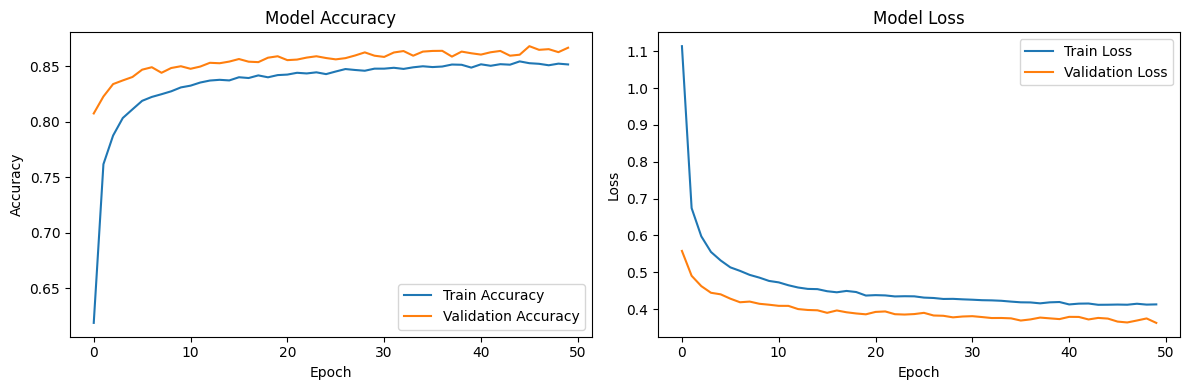

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_classifier.history['accuracy'], label='Train Accuracy')
plt.plot(history_classifier.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_classifier.history['loss'], label='Train Loss')
plt.plot(history_classifier.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 128)               4224      
                                                                 
 batch_normalization_16 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_17 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_1 (Dropout)         (None, 64)               

In [ ]:
test_loss, test_accuracy = classifier.evaluate(x_test_encoded, y_test, verbose=0)
print(f'test accuracy: {test_accuracy:.4f}')
print(f'test loss: {test_loss:.4f}')

test accuracy: 0.8668
test loss: 0.3623
